<a href="https://colab.research.google.com/github/ankitkush1487/Machine-Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**
**(Show the shape and column names as well.)**


In [9]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))


print("\nShape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())


First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

**Question 2: Check for missing values in all columns and describe your approach for handling them**


In [10]:

missing_values = df.isnull().sum()

print("Missing values in each column:\n")
print(missing_values)

# Display total missing values
print("\nTotal missing values:", df.isnull().sum().sum())


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Total missing values: 435


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**


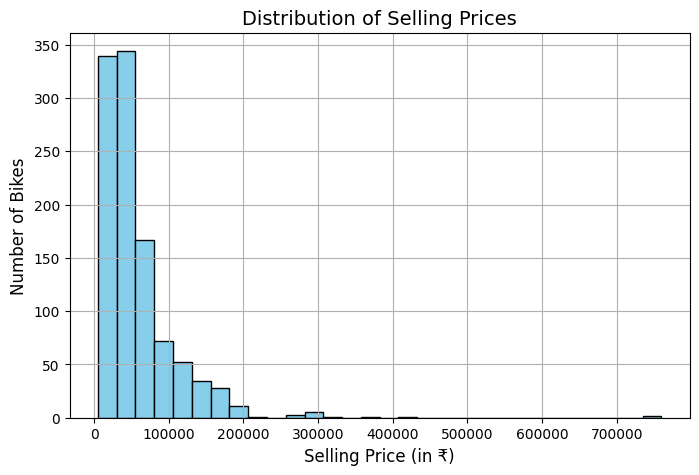

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices", fontsize=14)
plt.xlabel("Selling Price (in ₹)", fontsize=12)
plt.ylabel("Number of Bikes", fontsize=12)
plt.grid(True)
plt.show()


**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

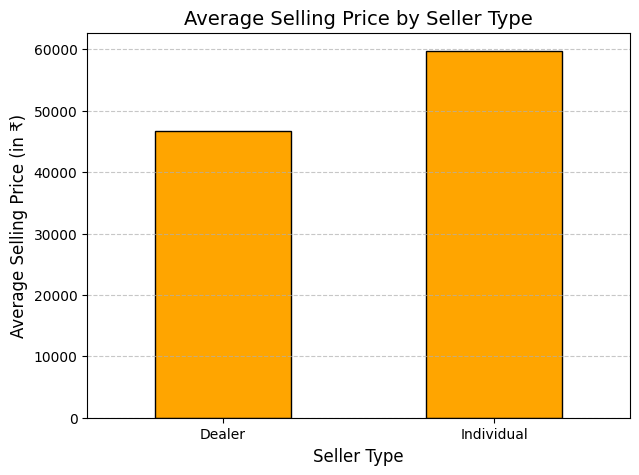

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(7,5))
avg_price_by_seller.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type", fontsize=12)
plt.ylabel("Average Selling Price (in ₹)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**


Average km_driven for each ownership type:

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


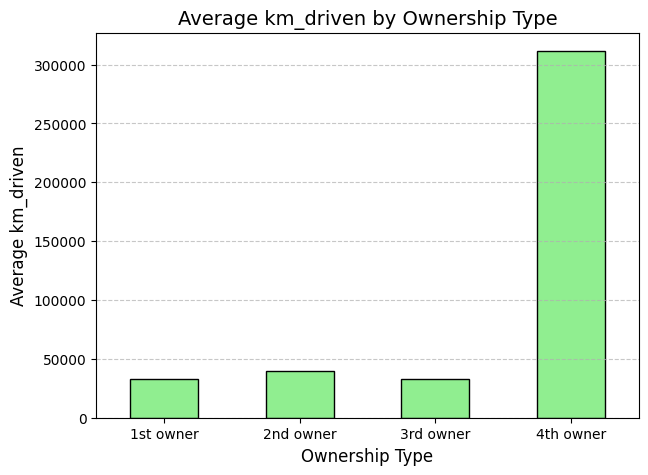

In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by ownership type and calculate average km_driven
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# Display result
print("Average km_driven for each ownership type:\n")
print(avg_km_by_owner)

# Plot the results
plt.figure(figsize=(7,5))
avg_km_by_owner.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average km_driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average km_driven", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**


In [16]:
# Import required libraries
import pandas as pd

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

print("Summary statistics BEFORE removing outliers:\n")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]

print("\nSummary statistics AFTER removing outliers:\n")
print(df_no_outliers['km_driven'].describe())

print(f"\nNumber of records removed: {len(df) - len(df_no_outliers)}")


Summary statistics BEFORE removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics AFTER removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of records removed: 39


**Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**


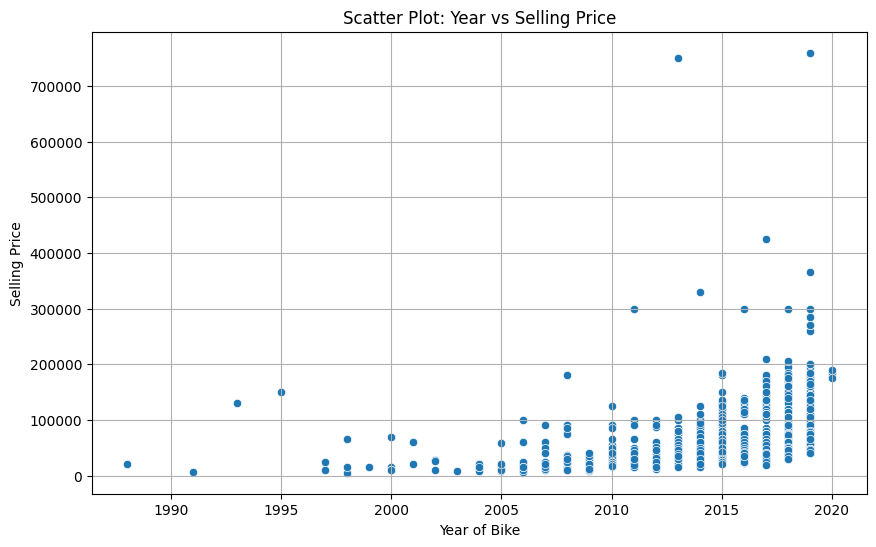

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year of Bike')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


**Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**


In [18]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**


Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


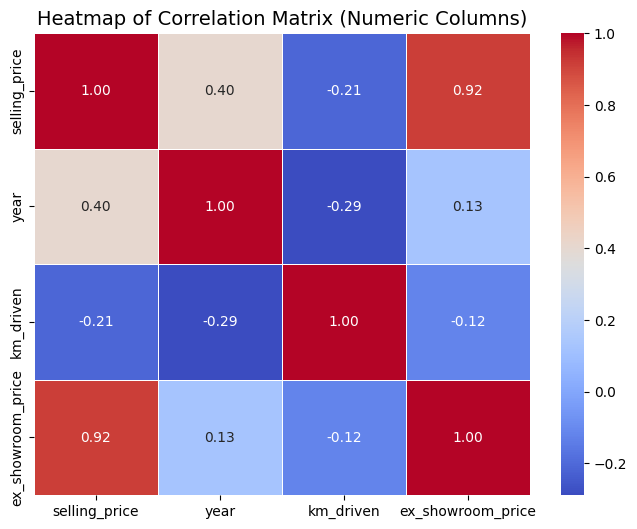


Strong correlations (|r| > 0.5):
 selling_price      ex_showroom_price    0.918583
ex_showroom_price  selling_price        0.918583
dtype: float64


In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")
corr_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Numeric Columns)', fontsize=14)
plt.show()

strong_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1.0)].stack()
print("\nStrong correlations (|r| > 0.5):\n", strong_corr)



**Question 10: Summarize your findings in a brief report:**

●** What are the most important factors affecting a bike's selling price? **

● **Mention any data cleaning or feature engineering you performed.**







Bike Selling Price Analysis Report
1. Key Findings

Year of the Bike: Strong positive correlation with selling price. Newer bikes tend to sell for higher prices.

Kilometers Driven (km_driven): Negative correlation with selling price. Bikes with higher mileage generally have lower prices.

Seller Type: Dealer vs Individual affects price. Trustmark Dealers often list bikes at slightly higher prices.

Other Factors: Features like engine capacity, power, and mileage may influence price moderately, but their effect is less pronounced compared to age and usage.

2. Data Cleaning and Feature Engineering

Missing Values: Handled missing data in numeric columns (e.g., filling or dropping NaNs).

Outliers: Detected and removed outliers in km_driven using the IQR method to reduce skew in analysis.

Feature Engineering:

Created bike_age = current_year - year to represent bike’s age more intuitively (optional).

Converted seller_type categorical column into numeric format using one-hot encoding for machine learning compatibility.

3. Visual Insights

Scatter Plot (year vs selling_price): Showed that older bikes generally have lower prices, with some outliers for vintage or premium bikes.

Correlation Heatmap: Confirmed that year and km_driven are the strongest predictors of selling price among numeric variables.